# 计 06 班中厅讲座—— Python tutorial for input method homework

大家好，这篇文档主要来分享下一些 Python 使用技巧来完成本次人智导小作业。

本次讲座的[回放链接](https://cloud.tsinghua.edu.cn/d/29ade1c39b2d4eac91e7/)、[PDF 文档](https://zhaochenyang20.github.io/pdf/python_tutorial.pdf)、[ipynb 文档](https://zhaochenyang20.github.io/ipynb/python_tutorial.ipynb) 和 [html 文档](https://zhaochenyang20.github.io/html/python_tutorial.html)。

人智导小作业本身并不复杂，按照我小学期只知道一个文件跑到底，无脑敲自己完全不懂的命令行指令也能完成，所以具体作业的一些 trick 放到文末来讲解，先结合自己的理解，介绍一些实用技能栈。

我们先从最原始的一个问题出发，Python 程序如何 debug。我们在学 DSA 的时候，debug 基本上依靠打断点加 print 的方法完成，Python 同样如此，我们也可以基于主流 IDE 来打断点，或者输出调试。然而我个人更倾向于将 IDE(pycharm) 视为一个带有代码补全功能的文本编辑器，所有的程序运行全是通过命令行执行。~~主要是我懒得操作 GUI 来配环境。~~

我来解释下为什么这么做。首先，我们大家都知道 Python 程序具有前向不可兼容性。也就是部分 Python 2 的代码可能不能在 Python 3 中运行，然后部分Python 3.3 的代码不能在 Python 3.11 中使用。当我们所写的工程越来越多之后，他们所依赖的 Python 环境会各不相同。倘若都安装在统一的Python环境当中，也就是 base 环境下，那么我们的 base 环境会非常的拥肿，而且可能会因为不同工程需要的 Python 版本库之间的不同，导致 A 工程能正常运行而 B 工程不能。所以这个时候我们就需要用 conda 来把这些不同的环境分割开来。理论上，最好为每个 Python 工程创建一个单独的 conda 环境。比如我电脑上的 conda 环境如下。

In [1]:
!source activate
!conda info -e

# conda environments:
#
base                     /Users/zhaochen20/opt/anaconda3
analysis              *  /Users/zhaochen20/opt/anaconda3/envs/analysis
torch                    /Users/zhaochen20/opt/anaconda3/envs/torch



主要是我的电脑里 conda 环境各不相同，而每次为新的工程配置好了 conda 环境后，再配置到 IDE 里比较麻烦，所以我所有的代码都是 IDE 编辑 + shell 执行。

我这么做就会遇到一个小问题，我该怎么打断点呢，听上比较麻烦，似乎没有像 C艹 一样很方便的打断点的工具。这个时候，第一个库，IPython 可以起到很大作用。

IPython (注意大小写)是一个基于 Python Shell 的交互式解释器，但是有比默认Shell强大得多的编辑和交互功能。同时，还是一个功能强大的 Python 库。IDE 的断点功能就是依靠 IPython 的 embed 方法实现的，我这里演示下。

embed 的功能为，当运行到这一指令时，进入 IPython 交互环境，同时监测所有的变量，将所有的修改进入内存当中，退出这一环境之后再接着运行余下的程序。

In [2]:
from IPython import embed

x = 1
embed()

Python 3.8.8 (default, Apr 13 2021, 12:59:45) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.22.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: x
Out[1]: 1

In [2]: x += 1

In [3]: x
Out[3]: 2

In [4]: y
-----------------------------------------------------------------
NameError                       Traceback (most recent call last)
<ipython-input-4-9063a9f0e032> in <module>
----> 1 y

NameError: name 'y' is not defined

In [5]: exit()



这里其实就是起到了打断点的作用，基于此，我们就可以来讨论 Python 工程 debug 的问题。
最原始的办法当然是直接跑，然后全局跑，直到出 bug，然后对着行数去 debug。关键是你一次不一定能对，这样子得反复折腾很久。甚至，你可能会跑一个特别大的程序，中途不序列化储存数据，每次重跑都会跑很久，这显然很 brute 而且低效。
我自己的 debug 方法如下：

In [1]:
from IPython import embed

try:
    x += 1
except Exception as e:
    embed()

Python 3.8.8 (default, Apr 13 2021, 12:59:45) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.22.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: e
Out[1]: NameError("name 'x' is not defined")

In [2]: exit()



每当我对某段代码感到不确定，比如担心读取 json 的时候出现解码错误，大概用这个流程：

In [4]:
from IPython import embed

@metric
def prettify(file):
    with open(file, "r", encoding="utf-8") as f:
        try:
            meta_web = json.load(f)["html_content"]
        except Exception as e:
            print(e)
            print(file)
            embed()
            return
        soup = BeautifulSoup(meta_web, "lxml").prettify()
        with open(test_txt, "w", encoding = "utf-8") as t:
            t.write(soup)

NameError: name 'metric' is not defined

基于这部分代码，我们能够实现读取文件，倘若文件无法去按照 json 格式读取，进入 exception 逻辑，打印出问题和出现问题的文件，进入 IPython 交互界面，根据需求查看程序执行情况，选择退出或者返回。

接下来，讲述下 jupyter notebook 的使用。实际上，这个讲义就是按照 jupyter notebook 写的，之前我一直对 jupyter 不以为然，直到最近才发现他真香。
> Jupyter Notebook 以网页的形式打开格式文件 (ipynb)，可以在网页页面中直接编写代码和运行代码，代码的运行结果也会直接在代码块下显示的程序。如在编程过程中需要编写说明文档，可在同一个页面中直接编写，便于作及时的说明和解释。
> 同时，jupyter 能够在远端服务器启动后，在本地的浏览器编写，相当于是在浏览器里的远端 IDE。
> 他还支持导出 tex, pdf, md 等主流文件，非常方便。

这里附带上一些我用 jupyter 写出的成果：
[Distribution is all you need PDF](https://zhaochenyang20.github.io/pdf/distribution.pdf)
[Distribution is all you need IPYNB](https://zhaochenyang20.github.io/ipynb/distribution.ipynb)
[Python Tutorial PDF](https://zhaochenyang20.github.io/pdf/python_tutorial.pdf)
[Python Tutorial IPYNB](https://zhaochenyang20.github.io/ipynb/python_tutorial.ipynb)

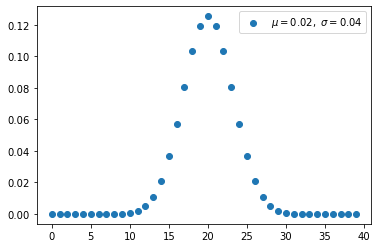

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import operator as op
from functools import reduce
def const(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom
def binomial(n, p):
    q = 1 - p
    y = [const(n, k) * (p ** k) * (q ** (n-k)) for k in range(n)]
    return y, np.mean(y), np.std(y)
for ls in [(0.5, 40)]:
    p, n_experiment = ls[0], ls[1]
    x = np.arange(n_experiment)
    y, u, s = binomial(n_experiment, p)
    plt.scatter(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
plt.legend()
plt.show()

接下来是 tqdm 和 p_tqdm，这两个库功能简单，直观易用，就是为循环加入可视化进度条，便于监视程序执行进度。

In [4]:
from tqdm import tqdm

for i in tqdm(range(10_000_000)):
    pass

100%|██████████| 10000000/10000000 [00:01<00:00, 5799361.34it/s]


这当我跑小型循环的时候，他当然不太需要监督进度，但是比如这次人智导要处理上千个文件，处理过程大概需要 30 分钟，故而不加入进度条，我们很难看到代码运行到了哪一步，这时候 tqdm 就会很方便。
下面是 p_tqdm，p 是 parallel 的意思。使用单个 tqdm 对于 cpu 的利用率不会很高，采用并行多线程，会显著提高效率。

In [1]:
from p_tqdm import p_map
from IPython import embed

def add(list_item, arg):
    return list_item + arg

origin_list = range(10000)

try:
    results = p_map(add, origin_list, range(1, len(origin_list) + 1))
    embed()
except Exception as e:
    embed()

  0%|          | 0/10000 [00:00<?, ?it/s]

Python 3.8.8 (default, Apr 13 2021, 12:59:45) 
Type 'copyright', 'credits' or 'license' for more information
IPython 7.22.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]: exit()



In [ ]:
from p_tqdm import p_map

def train_each_document(document, process_id):
    """
    :param document: a json file path, containing a long string like "苟利国家生死以|美国的华莱士比你们不知道高到哪里去了|没这个能力|"
    :return: the neuron itself
    """
    neuron = Neuron()
    try:
        with open(document, "r", encoding="utf-8", errors="ignore") as f:
            contents = json.loads(f.read())
    except:
        return neuron
    string_list = contents.split("|")
    for sentence in string_list:
        neuron.train_each_sentence(sentence)
    store_path = Path.cwd() / "trans_training_result"
    if not store_path.is_dir():
        os.makedirs(store_path)
    store_name = store_path / f"{process_id}.npz"
    np.savez(store_name, neuron.one, neuron.two, neuron.three)
    return neuron

def train_total_dir(self, director):
        """
        use a director of document to train the neuron
        """
        training_list = get_list(director)
        results = p_map(train_each_document, training_list, range(1, len(training_list) + 1))
        for each in results:
            self.add_neuron(each)

typing 是一个用于写出精准注释的库，正常情况下，我们的代码需要如下的注释：

In [ ]:
def train_each_document(document: str, process_id: int):
    """
    :param document: a json file path, containing a long string like "苟利国家生死以|美国的华莱士比你们不知道高到哪里去了|没这个能力|"
    :return: the neuron itself
    """

typing 库还支持更高级的注释，比如 List（注意大小写）：

In [ ]:
from typing import List
def print_names(names: List[str]) -> None:
    for student in names:
        print(student)

当然，也支持[注释自己定义的类](https://zhaochenyang20.github.io/2022/01/09/CS/others/typing/)。可能在 Django 里有些作用...

Counter 和 OrderedDict 是两个 dictionary 的子类，非常方便。
我们都知道在字典中查找不存在的键，程序会抛出 KyeError 的异常，但是由于 Counter 用于统计计数，因此 Counter 不同于字典，如果在 Counter 中查找一个不存在的元素，不会产生异常，而是会返回 0，这其实很好理解，Counter 计数将不存在元素的 count 值设置为 0。

对我而言，用了 Counter 类可以大量节省这个语句：

In [1]:
from collections import Counter
try:
   course_total_order[course] += 1
except:
   course_total_order[course] = 1

# 用 Counter 类之后，只用写
course_total_order = Counter()
course_total_order[course] += 1

NameError: name 'course_total_order' is not defined

OrderedDict 顾名思义，有序字典，Python 原生字典的实现是有序的，但是这个顺序很复杂，大概率不同于 key-value pair 加入 Dict 的顺序，而 OrderedDict 可以按照加入顺序来遍历。

In [2]:
from collections import OrderedDict

dict = OrderedDict()

dict["Bob"] = 1
dict["Alice"] = 2
dict["Carl"] = 3
    
for key in dict:
    print(key, dict[key])

Bob 1
Alice 2
Carl 3


接下来是 Pathlib，我之前在我的 Mac 上写工程，我的文件路径是硬编码的，导致移植到 windows 上会出很多问题，而且经常因为路径里的"/"和"\\"被坑，直到 lambda 给我推荐了 Pathlib

Pathlib 和 os 的很多操作类似，但是封装的更好，比如快捷的工作路径切换，目录拼接，还有文件检测。

In [3]:
import os
from pathlib import Path

store_path = Path.cwd() / "final_training_result"
if not store_path.is_dir():
    # os.makedirs(store_path)
    pass
store_name = store_path / "refactor.npz"
print(store_name)
print(store_path)

/Users/zhaochen20/blog_zhaochen20/source/ipynb/final_training_result/refactor.npz
/Users/zhaochen20/blog_zhaochen20/source/ipynb/final_training_result


Numpy 的功能非常强大，是专业的数据科学库。很多人说，numpy 就是用 C++ 写的 Python 库，效率堪比 C++。实际上，具体去了解下的话，numpy 比 C++ 还底层，他实际上大量用了 Fortran 来编写底层计算，堪比汇编的效率。
具体的科学计算方法对应查表即可，这里先讲讲序列化与反序列化。

这次人智导作业里，我们需要把训练好的模型存下来。大多数同学选择把一个很大的 Dict 存为 json，然后读取 json。我的建议是，用 numpy 把 Counter 序列化为 npz 格式，然后读取 npz。json 实际上是文本文件，Linux 内核读取文本文件的速度远低于读取二进制文件，而 npz（~~还有 npy~~）实际上是二进制文件，读取和加载速度非常快，而且比文本文件内存少了很多，从 1.4G 的 json 压缩为 0.6G 的npz。

当然，npz 自然有缺点，只能用 numpy 来读取，而且人类不可理解。我 SRT 的工作，需要把爬虫爬下来的网页解析 html，然后保存。我自己肯定就存 npz 了，但是我们组里其他同学完全不会用，所以我还是存了 json 和 CSV。

In [4]:
import os
from pathlib import Path
import numpy as np

store_path = Path.cwd() / "test.npz"
dict = {"Eren zhao": 1, "跳跳鸟": 2, "鲁大师": 3, "lambda": 4, "c7w": 5}
np.savez(store_path, dict=dict)

In [6]:
!ls
!du -hs test.npz

distribution.ipynb    python_tutorial.ipynb test.npz
4.0K	test.npz


In [7]:
dictionary = np.load(Path.cwd() / "test.npz", allow_pickle=True)["dict"].item()
print(dictionary)

{'Eren zhao': 1, '跳跳鸟': 2, '鲁大师': 3, 'lambda': 4, 'c7w': 5}


当然，这背后还涉及 numpy ndarray 的取对象和切片问题，需要另外研究。

decorator 这个工具属于我自己也不太懂，只能简单讲讲。
我实验室的大师兄（~~还有掌门师姐~~）他们写的 code，满篇都是这个鸭子：

In [ ]:
@metric
def train_total_dir(self, director):
    """
    use a director of document to train the neuron
    """
    try:
        training_list = get_list(director)
        results = p_map(train_each_document, training_list, range(1, len(training_list) + 1))
        for each in results:
            self.add_neuron(each)
        neo_one = {}
        neo_two = {}
        neo_three = {}
        print("filter 1 unit")

我一直不太理解，这个 @metric 是什么意思，后来我发现了这个是修饰器语法，和 shebang 语法很像。（shebang 待会再讲）

In [ ]:
@metric
def func():
    pass

# 这句话等价于

fuc = metric(func)

然后，metric 修饰器的定义自行查找，一般而言，修饰器不影响代码逻辑，但是可以添加统一的功能，类似于打印执行的时间和运行在哪张卡上，其实就是 oop 的封装思想。

In [ ]:
def metric(fn):
    """running time for each main function"""

    @functools.wraps(fn)
    def wrapper(*args, **kw):
        print('start executing %s' % (fn.__name__))
        start_time = time.time()
        result = fn(*args, **kw)
        end_time = time.time()
        t = 1000 * (end_time - start_time)
        print('%s executed in %s ms' % (fn.__name__, t))
        return result
    return wrapper

这是我常用的装饰器，展示程序运行的毫秒数，OVO

接下来是 argparase，这次人智导作业要求能够形式化解析命令行参数，那么 argparase 就是神器。

In [ ]:
import argparse

def parser_data():
    parser = argparse.ArgumentParser(
        prog='Pinyin Input Method',
        description='Pinyin to Chinese.',
        allow_abbrev=True,
    )
    parser.add_argument('-i', '--input-file', dest='input_file_path', type=str, help="Input file")
    parser.add_argument('-o', '--output-file', dest='output_file_path', type=str, help="Output file")
    parser.add_argument('-c', '--coefficient', dest='coefficient', type=float, nargs=2, default=[0.4, 0.5], help="coefficient")
    input_file_path = parser.parse_args().input_file_path
    output_file_path = parser.parse_args().output_file_path
    coefficient = parser.parse_args().coefficient
    try:
        assert os.path.exists(input_file_path) == True
    except:
        print(f"You may use an existing file. But you have use an unexisting file: {input_file_path}")
        print("Thus, the progress would exit right now.")
        exit(1)
    try:
        assert len(coefficient) == 2 and coefficient[0] <= 1 and coefficient[1] <= 1
    except:
        print(f"You may input two coefficient. And theyshould be less than 1. But you have input: {coefficient}")
        print("Thus, the progress would exit right now.")
        exit(1)
    return input_file_path, output_file_path, coefficient

运行方式 'python3 pinyin.py -i  ./input_2.txt -o ./test.txt -c 1 1' 

 可以通过 'python3 pinyin.py -h` 获取帮助

接下来讲点 Linux，主要是方便大家在服务器上跑代码...
说起来，我之所以选择用 jupyter 跑远程代码，是应为我的 Mac 各种 IDE 连接服务器都很拉胯，我试过 Vscode，Jetbrain Gateaway...
也用过原生 ssh + nano，直到一位朋友给我推荐了 jupyter，我一开始以为 jupyter 的意义是提供了代码 + 文档的共同编写环境，实际上：

> jupyter是懒人包，方便可视化和debug，尤其是服务器上。web 环境调 ui 比 window 方便。你设置好以后在自己笔记本上用 ip 访问和操作，比较方便。

简直是神器！

稍微说一句 heredoc

In [ ]:
> cat << EOF > now
heredoc> #! usr/local/bin/python3.9
heredoc> from datetime import datetime
heredoc> print('current time is %s' % datetime.now())
heredoc> EOF
# 这里需要在命令行运行，不做展示

heredoc 就是类似上方的格式，可以实现创建新文本的功能，虽然用 vim，nano，touch 都可以。~~反正技多不压身~~

接下来是 shebang:

> 在计算领域中，Shebang（也称为Hashbang）是一个由井号和叹号构成的字符序列 #!，其出现在文本文件的第一行的前两个字符。 在文件中存在 Shebang 的情况下，类 Unix 操作系统的程序加载器会分析 Shebang 后的内容，将这些内容作为解释器指令，并调用该指令，并将载有Shebang的文件路径作为该解释器的参数。

但我有时候发现，我使用的 shebang 对 conda 的支持不太行，还需要继续学习。

conda 是最后一个内容。~~相信大家都懂，我就不讲了~~

In [ ]:
# 一个基本的conda流程
> conda create -n env_name python=3.8
> source activate env_name
# 这个应该是 M1 Mac 的问题，Linux 和 Windows 都不用
> conda install whaterever
# 如果 conda 装不了，那就用 pip
> pip install whatever

# conda activate 失败
> conda activate SRT_crawler
CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
> source activate
> conda activate SRT_crawler

#  在某个具体的 conda 环境下，使用 pip 就是安装到这个特定的 conda 环境
# 对于单个包的安装，不管换不换国内源，都可能遇上安装超时的问题
> pip install python-moudle

raise ReadTimeoutError(self._pool, None, "Read timed out.")
pip._vendor.urllib3.exceptions.ReadTimeoutError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Read timed out.

# 解决方案
> pip --timeout=100 install python-moudle

# 如果是依靠某个具体的requirement.txt，则：
pip --default-timeout=100 install -r requirements_demo.txt

# ok，太慢，不如直接换源
> conda config --add channels https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free/
> conda config --set show_channel_urls yes

最后讲一讲 pythonic 代码风格的问题，老实说，我不是很确定我是否 pythonic，pythonic 的精华很大部分来自各种推导，比如这一段：

In [ ]:
# 出自软工后端小作业，写的真的喵！
def messages_for_user(request):

    def gen_response(code: int, data: str):
        return JsonResponse({
            'code': code,
            'data': data
        }, status=code)

    try:
        assert request.method == "POST"
        name = request.COOKIES['user']
        user = User.objects.get(name=name)
        messages = Message.objects.filter(user=user)
        assert len(messages) != 0
        return gen_response(200, [
            {
                'title': msg.title,
                'content': msg.content,
                'timestamp': int(msg.pub_date.timestamp())
            }
            for msg in messages.order_by('-pub_date')
        ])
    except Exception as e:
        print(e)
        return gen_response(400, "查无此人")

我这里讲讲我们实验室的代码风格，自己很喜欢。
一个 Python 工程分若干个脚本文件，每个文件构造如下：

1. 引用原生库和手写库
2. 定义全局变量
3. 定义修饰器
4. 定义类和成员函数
5. 定义函数（包括 argparse）
6. 定义主函数
7. 定义 pipeline

最后定义 pipeline，用 os.system 一个个跑，比如这亚子：

In [ ]:
import os

def pipeline():
    print("refactor start")
    os.system("python3 refactor_data.py > refactor_log.txt")
    print("train start")
    os.system("python3 train.py -s Large > training_log.txt")
    print("judge start")
    os.system("./complete.sh > complete_log.txt")

if __name__ == "__main__":
    pipeline()

这里实际上是用 os 代替了 ShellScript，实际上所有的 shell 脚本都能用 os.system 代替，而且更可读，毕竟大家更了解 Python，而非 shell 语法。虽然 shell 语法个人认为不太重要，但是 linux 指令很重要。

```
for i in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
do
	for j in 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1
	do
		python3 pinyin.py -i ./测试语料/input_2.txt -o ./test.txt -c $i $j
	done
done
for i in 0.9 0.99 0.999 0.9999 0.99999 1
do
        for j in 0.9 0.99 0.999 0.9999 0.99999 1
        do
                python3 pinyin.py -i ./测试语料/input_2.txt -o ./test.txt -c $i $j
        done
done
```

最后来讲讲我这次人智导炼丹的体会：

**数据选择**

寒假一次组会，我们实验室一个老师分享了一个视觉网络的攻击方法。他们往 Apple 的人脸识别网络塞了 7G 的双胞胎照片，然后把这个神经网络搞废了。（~~得了 Apple 的奖励~~）我之前只是知道，一些不合理训练数据会破坏神经网络，但是这次我自己体会了一边。

起初我试图用 wiki 语料库与原生的新浪语料库来训练，然而训练出来的结果完全不行。我试图让他输出 "bei jing ni hao"( 北京你好 ），结果是( 背景尼耗 )，我非常不能理解。北京写成了背景我能接受，你好写成尼耗，这我恨不能接受。
查看了很久算法设计，调了各种模型参数，都没解决，于是我直接加载统计结果，才发现”你好“出现过 47 次，“你”出现过 96 次。“尼耗”出现过 145 次，“尼”出现过 1567 次。仔细查看数据集，我才发现， wiki 语料库里面有罗马尼亚，坦桑尼亚，印度尼西亚等国家的百科，全都带“尼”字。

可以说，wiki 这个数据集，直接毁掉了这次训练。我进一步反思，这次的测试集都是 2021 年的流行语，新浪新闻还能沾边，但是 wikipedia 和流行语想去甚远，而且大多数中文维基都是华人和港澳台同胞编写的，和大陆的流行语也差别很大。在流行语测试集上直接废了，完全能理解。

去掉 Wikipedia 的训练集后，我先用新浪新闻来训练，训练结果大概为 60%。再三思考，我加入了百度知道的语料库，因为我查询过这个语料库还是很口语化，也很流形化，虽然我不知道对于助教检查的测试集如何，但是起码这次给的众包测试机还是比较有用。果然，这个训练集，大概 2 倍于新浪训练集，让我的模型涨了 5 个点（从 60 到 65）

还有个小的插曲，我一开始 json 重新格式化的时候，去掉了出去"。"和"，"之外的符号，然后按照句号和逗号分割句子。这一步还挺正常，然而我一开始想着，可以省点内存，于是还去掉了长度小于 5 的字符串。内存没剩下多少，但是让我很后怕。毕竟，“你好”，“我听说”这样的短句全都没了。

最后一次全集测试的时候，我从头开始训练，没有删去短句，发现涨了 2 个点（从 63 涨到了 65）

**模型修改**

人工智能本质上是基于数学原理的数据科学，我得出于清晰的数学原理。本模型的数学原理是隐式马尔科夫模型，也就是单个字的概率相乘。如果取了对数，就能变成概率的对数相加。然而一开始，我的模型没有取对数，却直接相加，根本性背离了数学原理。之后经过实验室老师的提醒，我才发现这一点。**仅仅是在模型之前加上 `math.log` 就让我的模型涨了 30 个点（从 30 涨到 60）**

除此之外，我还对模型添加了惩罚参数。

最开始的模型如下：
```python
def cost(characters: str, coefficient: List[float]) -> float:
    """
    Since the three unit cost is determined by three characters, we need three characters to get the cost.
    """
    x = coefficient[0]
    y = coefficient[1]
    model = len(characters)
    try:
        if model == 1:
            try:
                return math.log(one[f"{characters}"] / 10_000_000)
            except:
                return 0
        elif model == 2:
            try:
                return math.log((1 - x) * one[f"{characters[1]}"] / 10_000_000 + x * (two[f"{characters}"] / one[f"{characters[0]}"]))
            except:
                return 0
        else:
            try:
                return math.log(y * three[characters] / two[characters[0:2]] + (1 - y) * ((1 - x) * one[f"{characters[2]}"] / 10_000_000 + x * (two[f"{characters[1:3]}"] / one[f"{characters[1]}"])))
            except:
                return 0
    except Exception as e:
        embed()
        exit()
```

这一段的逻辑，是如果发现某个词不存在，就返回 0，作为特殊处理。直到我后来打断点，用 embed() 去查看每条边的权重，我才发现，有的很常见的词组，比如“机器学”，返回的权重是 -1.13，然而”骥亓敩“由于这个三元组没有出现过，故而权重为 0，当然会选择后者而非前者。于是我加大了惩罚，查询不成功就返回 -100000，这次效果很好，涨了 30 个点（从 0 涨到 30）